In [1]:
%load_ext autoreload
%autoreload 2


In [23]:
from gammapy.data import DataStore
from astropy.coordinates import SkyCoord
from astropy.time import Time
from agn_pipe.query import  get_exclusion_regions, query_datastore

In [24]:
c = SkyCoord.from_name("1ES 2344+514")
fname = "/raid/RAID1/VERITAS_Data/gammapy/dl3_fullenclosure_moderate2tel_runwise/"
ra = c.ra.deg
dec = c.dec.deg
search_cone = 2.0
tstart = Time("2007-01-01T00:00:00")
tstop = Time("2020-03-01T00:00:00")


In [25]:
data_store = DataStore.from_dir(fname)

In [26]:
data_store.obs_table[data_store.obs_table["OBJECT"] == "1ES2344+514"]

OBS_ID,RA_PNT,DEC_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,N_TELS,TELLIST,OBJECT,RA_OBJ,DEC_OBJ,DATE-OBS,DATE-AVG,DATE-END,NSBLEVEL
,deg,deg,deg,deg,deg,s,s,,s,s,,,,deg,deg,,,,
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes20,bytes20,float32,float32,bytes20,bytes20,bytes20,float32
91540,-3.2298782,52.20503,24.988644,65.01136,331.01257,1621.0,1497.6868,0.92392766,437453100.0,437454900.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2018-12-13T02:44:56.,2018-12-13T02:59:56.,2018-12-13T03:14:56.,7.8200083
100366,-4.0368075,51.70236,20.094006,69.906,0.4251815,1801.0,1555.5691,0.86372524,529040670.0,529042460.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2021-11-07T03:44:33.,2021-11-07T03:59:33.,2021-11-07T04:14:34.,7.309654
58115,-3.2300913,51.20503,22.494516,67.505486,334.63992,902.0,849.22754,0.9414939,212047090.0,212048290.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2011-10-22T05:58:00.,2011-10-22T06:08:01.,2011-10-22T06:18:02.,5.902481
43181,-2.4232147,51.70223,20.249977,69.75002,354.4558,69.0,62.691395,0.90857095,120108056.0,120108120.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2008-11-22T03:20:53.,2008-11-22T03:21:27.,2008-11-22T03:22:01.,4.980234
64192,-3.230098,51.20503,21.027796,68.972206,341.0751,1202.0,1017.38727,0.846412,243237600.0,243238800.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2012-10-17T05:59:58.,2012-10-17T06:09:59.,2012-10-17T06:20:00.,7.8332186
75183,-4.036807,51.70233,20.111921,69.88808,3.3943107,1505.0,1266.917,0.8418053,309063520.0,309065020.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2014-11-18T02:58:34.,2014-11-18T03:11:06.,2014-11-18T03:23:38.,6.59573
94513,-4.0368075,51.70235,22.211025,67.78898,338.29385,1741.0,1533.2745,0.8806861,465454800.0,465456580.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2019-11-02T04:59:44.,2019-11-02T05:14:44.,2019-11-02T05:29:44.,6.27253
64245,-3.230098,51.20503,20.542107,69.45789,344.29395,1202.0,1023.8006,0.8517476,243495540.0,243496740.0,4,"T1,T2,T3,T4",1ES2344+514,356.77,51.70503,2012-10-20T05:38:50.,2012-10-20T05:48:51.,2012-10-20T05:58:52.,6.85608


In [11]:
obs_ids = query_datastore(fname, ra, dec, search_cone)
# obs_ids = query_datastore(fname, ra, dec, search_cone, tstart, tstop)
len(obs_ids)

0

In [49]:
excl = get_exclusion_regions(ra, dec)

In [52]:
from pathlib import Path

# Check package versions
import numpy as np
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion

# %matplotlib inline
import matplotlib.pyplot as plt

In [54]:
from IPython.display import display
from gammapy.data import DataStore
from gammapy.datasets import (
    Datasets,
    FluxPointsDataset,
    SpectrumDataset,
    SpectrumDatasetOnOff,
)
from gammapy.estimators import FluxPointsEstimator
from gammapy.estimators.utils import resample_energy_edges
from gammapy.makers import (
    ReflectedRegionsBackgroundMaker,
    SafeMaskMaker,
    SpectrumDatasetMaker,
)
from gammapy.maps import MapAxis, RegionGeom, WcsGeom
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    ExpCutoffPowerLawSpectralModel,
    PowerLawSpectralModel,
    SkyModel,
    create_crab_spectral_model,
)

In [55]:
datastore = DataStore.from_dir(fname)
# obs_ids = [23523, 23526, 23559, 23592]
observations = datastore.get_observations(obs_ids)

In [56]:
target_position = SkyCoord(ra=ra, dec=dec, unit="deg", frame="icrs")
on_region_radius = Angle("0.089 deg")
on_region = CircleSkyRegion(center=target_position, radius=on_region_radius)

[133.335892, 19.322167, '0.35 deg']
0.35 deg
[133.480564, 19.967133, '0.35 deg']
0.35 deg
[134.732213, 21.166281, '0.35 deg']
0.35 deg


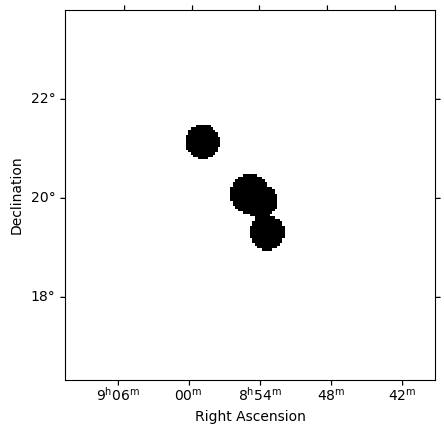

In [67]:
exclusion_region = CircleSkyRegion(
    center=SkyCoord(ra, dec, unit="deg", frame="icrs"),
    radius=0.4 * u.deg,
)

regions = [exclusion_region]
for exc in excl:
    print (exc)
    print (exc[2])
    regions.append(
        CircleSkyRegion(
            center=SkyCoord(exc[0], exc[1], unit="deg", frame="icrs"),
            radius= u.Quantity(exc[2]),
        )
    )
skydir = target_position
geom = WcsGeom.create(
    npix=(150, 150), binsz=0.05, skydir=skydir, proj="TAN", frame="icrs"
)

exclusion_mask = ~geom.region_mask(regions)
exclusion_mask.plot()
plt.show()

In [68]:
energy_axis = MapAxis.from_energy_bounds(
    0.1, 40, nbin=10, per_decade=True, unit="TeV", name="energy"
)
energy_axis_true = MapAxis.from_energy_bounds(
    0.05, 100, nbin=20, per_decade=True, unit="TeV", name="energy_true"
)

geom = RegionGeom.create(region=on_region, axes=[energy_axis])
dataset_empty = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true)

dataset_maker = SpectrumDatasetMaker(
    containment_correction=True, selection=["counts", "exposure", "edisp"]
)
bkg_maker = ReflectedRegionsBackgroundMaker(exclusion_mask=exclusion_mask)
safe_mask_masker = SafeMaskMaker(methods=["aeff-max"], aeff_percent=10)

In [69]:
datasets = Datasets()

for obs_id, observation in zip(obs_ids, observations):
    dataset = dataset_maker.run(dataset_empty.copy(name=str(obs_id)), observation)
    dataset_on_off = bkg_maker.run(dataset, observation)
    dataset_on_off = safe_mask_masker.run(dataset_on_off, observation)
    datasets.append(dataset_on_off)

# print(datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : 84492
  Instrument : VERITAS
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : 84715
  Instrument : VERITAS
  Models     : 

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : 85038
  Instrument : VERITAS
  Models     : 

Dataset 3: 

  Type       : SpectrumDatasetOnOff
  Name       : 84493
  Instrument : VERITAS
  Models     : 

Dataset 4: 

  Type       : SpectrumDatasetOnOff
  Name       : 84971
  Instrument : VERITAS
  Models     : 

Dataset 5: 

  Type       : SpectrumDatasetOnOff
  Name       : 85035
  Instrument : VERITAS
  Models     : 

Dataset 6: 

  Type       : SpectrumDatasetOnOff
  Name       : 84714
  Instrument : VERITAS
  Models     : 

Dataset 7: 

  Type       : SpectrumDatasetOnOff
  Name       : 84838
  Instrument : VERITAS
  Models     : 

Dataset 8: 

  Type       : SpectrumDatasetOnOff
  Name       : 84964
  Instrument : VERITAS
  Models

/home/obriens/mambaforge/envs/agn_pipe/lib/python3.11/site-packages/regions/shapes/circle.py:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Circle(xy=xy, radius=radius, **mpl_kwargs)


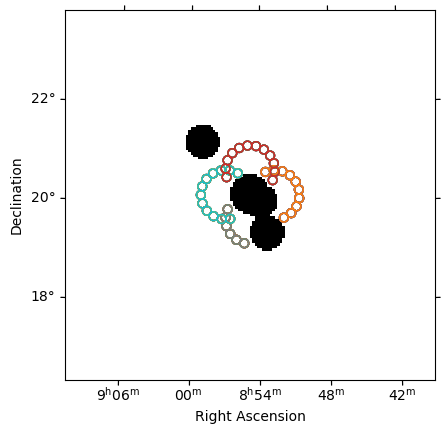

In [71]:
from gammapy.visualization import plot_spectrum_datasets_off_regions
plt.figure()
ax = exclusion_mask.plot()
on_region.to_pixel(ax.wcs).plot(ax=ax, edgecolor="k")
plot_spectrum_datasets_off_regions(ax=ax, datasets=datasets)
plt.show()

In [72]:
info_table = datasets.info_table(cumulative=True)

display(info_table)

name,counts,excess,sqrt_ts,background,npred,npred_background,npred_signal,exposure_min,exposure_max,livetime,ontime,counts_rate,background_rate,excess_rate,n_bins,n_fit_bins,stat_type,stat_sum,counts_off,acceptance,acceptance_off,alpha
,,,,,,,,m2 s,m2 s,s,s,1 / s,1 / s,1 / s,,,,,,,,
str7,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str5,float64,int64,float64,float64,float64
stacked,4,-0.7500004768371582,-0.34066360605212953,4.750000476837158,4.6923078213923075,4.6923078213923075,nan,1322975.875,189474272.0,1509.718121617501,1801.0000000000002,0.002649501216634022,0.003146283010598059,-0.0004967817939640368,27,24,wstat,3.9432778742404646,57,24.0,287.9999694824219,0.0833333432674408
stacked,12,1.8500003814697266,0.5387795565090371,10.149999618530273,10.308029059579251,10.308029059579251,nan,1793330.5,396770304.0,3058.79640932199,3602.0000000000005,0.003923111706104006,0.0033182985267006097,0.0006048131794033968,27,24,wstat,12.822137441965236,111,24.0,262.46307373046875,0.09144143760204315
stacked,16,2.683333396911621,0.6765490603654949,13.316666603088379,13.563131950969202,13.563131950969202,nan,2271413.0,557305408.0,4103.02079060988,4803.000000000003,0.0038995659092484715,0.003245576194389443,0.0006539897148590284,27,24,wstat,12.253636687599741,130,24.0,234.29287719726562,0.1024358943104744
stacked,21,2.083332061767578,0.4475987379499982,18.916667938232422,19.108340973368787,19.108340973368787,nan,3582557.0,751004160.0,5616.762640750675,6604.000000000004,0.0037388085171413564,0.003367895200161819,0.0003709133169795373,27,24,wstat,11.90060186385897,186,24.0,235.98236083984375,0.10170251876115799
stacked,26,0.5833320617675781,0.11005335090277497,25.416667938232422,25.468461376179892,25.468461376179892,nan,4118994.25,996926528.0,7158.694854440579,8405.000000000004,0.003631946958022949,0.0035504611462054874,8.148581181746195e-05,27,24,wstat,11.260129486489278,264,24.0,249.2852325439453,0.09627525508403778
stacked,35,7.333333969116211,1.2744555294670277,27.66666603088379,28.297107811589324,28.297107811589324,nan,5561240.5,1154457984.0,8415.198188835628,9864.000000000002,0.004159141497871578,0.00328770225133722,0.0008714392465343577,27,24,wstat,13.224305103698342,291,24.0,252.43374633789062,0.09507445245981216
stacked,42,8.416667938232422,1.3321341687629302,33.58333206176758,34.273698292728334,34.273698292728334,nan,5912447.0,1381302912.0,9959.498820436364,11665.000000000007,0.004217079670095269,0.0033719901640890163,0.0008450895060062526,27,24,wstat,13.167198318180386,362,24.0,258.69976806640625,0.09277163445949554
stacked,46,10.51666259765625,1.607643636280654,35.48333740234375,36.34362860575836,36.34362860575836,nan,6178205.0,1547499392.0,11262.825408862058,13169.000000000004,0.004084232715159137,0.003150482770906134,0.0009337499442530028,27,24,wstat,14.372010111213246,381,24.0,257.69842529296875,0.09313211590051651


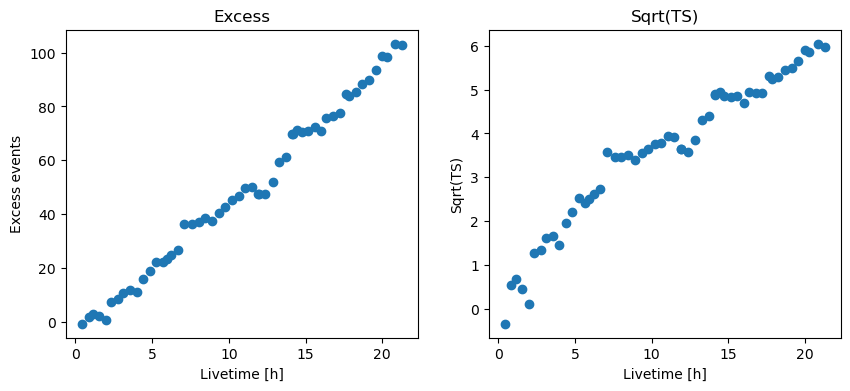

In [73]:
fig, (ax_excess, ax_sqrt_ts) = plt.subplots(figsize=(10, 4), ncols=2, nrows=1)
ax_excess.plot(
    info_table["livetime"].to("h"),
    info_table["excess"],
    marker="o",
    ls="none",
)

ax_excess.set_title("Excess")
ax_excess.set_xlabel("Livetime [h]")
ax_excess.set_ylabel("Excess events")

ax_sqrt_ts.plot(
    info_table["livetime"].to("h"),
    info_table["sqrt_ts"],
    marker="o",
    ls="none",
)

ax_sqrt_ts.set_title("Sqrt(TS)")
ax_sqrt_ts.set_xlabel("Livetime [h]")
ax_sqrt_ts.set_ylabel("Sqrt(TS)")
plt.show()

In [74]:
dataset_stacked = Datasets(datasets).stack_reduce()

In [78]:
spectral_model = PowerLawSpectralModel(
    amplitude=1e-12 * u.Unit("cm-2 s-1 TeV-1"),
    index=2,
    reference=1 * u.TeV,
)
model = SkyModel(spectral_model=spectral_model, name="OJ 287")

dataset_stacked.models = [model]

fit = Fit()
result = fit.run(datasets=dataset_stacked)

# we make a copy here to compare it later
model_best = model.copy()

In [ ]:
model_best

In [79]:
display(model_best.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link,prior
str1,str9,float64,str14,float64,float64,float64,bool,bool,str1,str1
,index,3.7619e+00,,4.470e-01,nan,nan,False,False,,
,amplitude,1.1196e-13,TeV-1 s-1 cm-2,6.148e-14,nan,nan,False,True,,
,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,,


In [95]:
e_min, e_max = 0.1, 10
energy_edges = np.geomspace(e_min, e_max, 10) * u.TeV

fpe = FluxPointsEstimator(
    energy_edges=energy_edges, source="OJ 287", selection_optional="all"
)
flux_points = fpe.run(datasets=dataset_stacked)

In [96]:
display(flux_points.to_table(sed_type="dnde", formatted=True))

e_ref,e_min,e_max,dnde,dnde_err,dnde_errp,dnde_errn,dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,stat_null,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),1 / (TeV s cm2),,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,float64,bool,float64[1],bool,float64[11],float64[11]
0.125,0.100,0.156,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.217,0.156,0.303,3.369e-11,9.164e-12,9.410e-12,8.925e-12,5.302e-11,16.814,4.101,130.45190011243528,43.35845,0.651,17.465,False,131.0,True,0.200 .. 5.000,10.723 .. 132.436
0.379,0.303,0.473,3.641e-12,1.398e-12,1.439e-12,1.358e-12,6.601e-12,7.994,2.827,104.95148222846177,27.677315,1.342,9.337,False,105.0,True,0.200 .. 5.000,5.802 .. 97.153
0.590,0.473,0.737,1.084e-12,4.286e-13,4.454e-13,4.124e-13,2.010e-12,7.951,2.820,61.67240585646486,20.371994,1.370,9.321,False,61.0,True,0.200 .. 5.000,6.911 .. 33.177
1.028,0.737,1.434,1.635e-13,8.243e-14,8.681e-14,7.825e-14,3.462e-13,4.963,2.228,34.11647641262868,11.914619,0.426,5.389,False,34.0,True,0.200 .. 5.000,4.120 .. 12.486
1.790,1.434,2.235,-7.023e-15,2.279e-14,2.596e-14,nan,5.206e-14,0.088,-0.297,4.18279230006097,-0.66811746,4.221,4.309,True,4.0,True,0.200 .. 5.000,4.379 .. 9.407
2.790,2.235,3.483,-2.932e-15,7.662e-15,9.413e-15,nan,nan,0.128,-0.358,0.8348880565043036,-0.45671442,1.978,2.106,True,1.0,True,0.200 .. 5.000,2.147 .. 4.007
4.348,3.483,5.429,2.667e-15,4.390e-15,nan,nan,nan,0.514,0.717,1.2768922099424103,0.64459866,2.789,3.303,True,1.0,True,0.200 .. 5.000,3.265 .. 2.800


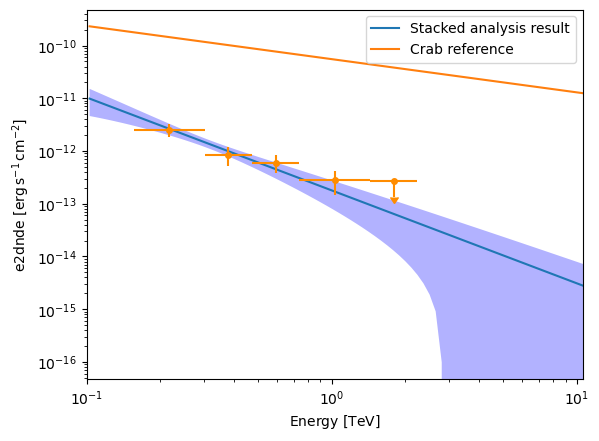

In [103]:
fig, ax = plt.subplots()

plot_kwargs = {
    "energy_bounds": [0.1, 30] * u.TeV,
    "sed_type": "e2dnde",
    "yunits": u.Unit("erg cm-2 s-1"),
    "ax": ax,
}

# plot stacked model
model_best.spectral_model.plot(**plot_kwargs, label="Stacked analysis result")
model_best.spectral_model.plot_error(facecolor="blue", alpha=0.3, **plot_kwargs)

crab = create_crab_spectral_model("hess_pl")
crab.plot(
    **plot_kwargs,
    label="Crab reference",
)

flux_points.plot(ax=ax, sed_type="e2dnde", color="darkorange")
# flux_points.plot_ts_profiles(ax=ax, sed_type="e2dnde")
ax.legend()
plt.show()

# sphinx_gallery_thumbnail_number = 5

In [98]:
# group results to an output file
flux_point_table = flux_points.to_table(sed_type="dnde", formatted=True)
model = model_best.to_dict()

In [99]:
model

{'name': 'Blb6q7Qz',
 'type': 'SkyModel',
 'spectral': {'type': 'PowerLawSpectralModel',
  'parameters': [{'name': 'index',
    'value': 3.7619151627564835,
    'error': 0.4469681852923323},
   {'name': 'amplitude',
    'value': 1.1196069302527371e-13,
    'unit': 'TeV-1 s-1 cm-2',
    'error': 6.148069589568835e-14},
   {'name': 'reference', 'value': 1.0, 'unit': 'TeV'}]}}

In [105]:
100 * model_best.spectral_model.integral(0.1 * u.TeV,30 * u.TeV) / crab.integral(0.1 * u.TeV,30 * u.TeV)

<Quantity 2.59524685>

In [190]:
from gammapy.estimators import LightCurveEstimator
import math

In [306]:
print (tstart tstop.mjd)

57754.0 57813.0


In [328]:
t0 = tstart
duration = 5 * u.day
n_time_bins = math.ceil((tstop - tstart) / duration)
print (n_time_bins)
times = t0 + np.arange(n_time_bins) * duration
print (times)
time_intervals = [Time([_tstart, _tstop]) for _tstart, _tstop in zip(times[:-1], times[1:])]


12
['2017-01-01T00:00:00.000' '2017-01-06T00:00:00.000'
 '2017-01-11T00:00:00.000' '2017-01-16T00:00:00.000'
 '2017-01-21T00:00:00.000' '2017-01-26T00:00:00.000'
 '2017-01-31T00:00:00.000' '2017-02-05T00:00:00.000'
 '2017-02-10T00:00:00.000' '2017-02-15T00:00:00.000'
 '2017-02-20T00:00:00.000' '2017-02-25T00:00:00.000']


In [332]:


dataset_joint = Datasets(datasets)
dataset_joint.model = model_best.copy()

In [333]:
lc_maker_1d = LightCurveEstimator(time_intervals= time_intervals,
    energy_edges=[0.1, 10] * u.TeV, source="OJ 287", reoptimize=False,
)


In [334]:
lc_1d = lc_maker_1d.run(dataset_joint, )



In [335]:
print(lc_1d.geom.axes.names)

display(lc_1d.to_table(sed_type="flux", format="lightcurve"))

['energy', 'time']


time_min,time_max,e_ref,e_min,e_max,flux,flux_err,ts,sqrt_ts,npred,npred_excess,stat,stat_null,counts,success
,,TeV,TeV,TeV,1 / (s cm2),1 / (s cm2),,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,54]","float64[1,54]",float64[1],float64[1],"float64[1,54]",bool[1]
57774.00080074074,57779.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,2.3877790942146748e-18,1.0159110035843828e-15,-5.320563879251949e-06,0.0,4.692308779500709 .. nan,1.13352871267125e-06 .. nan,50.02839459965676,50.02838927909288,4.0 .. nan,True
57784.00080074074,57789.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,4.7822753407227656e-18,8.347880303372503e-16,-5.199156333901556e-06,0.0,nan .. nan,nan .. nan,175.67895014820954,175.6789449490532,nan .. nan,True
57799.00080074074,57804.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,4.881108282022374e-12,2.2932646100987925e-12,5.42595273443397,2.32936745371656,nan .. nan,nan .. nan,41.41690389084828,46.84285662528225,nan .. nan,True
57804.00080074074,57809.00080074074,1.027808532802195,0.10000000000000002,10.563903801010005,1.3703319870389946e-12,2.043170806582187e-12,0.4688767390639157,0.684745747751613,nan .. nan,nan .. nan,114.12659056916846,114.59546730823237,nan .. nan,True


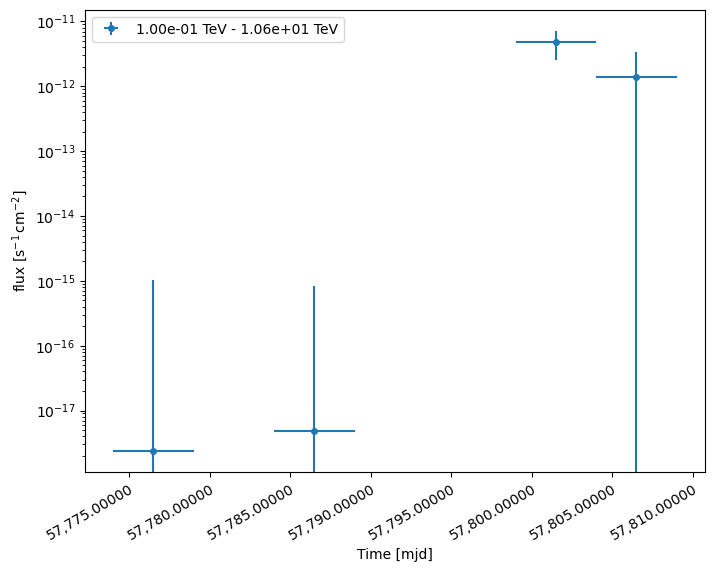

In [336]:
plt.figure(figsize=(8, 6))
lc_1d.plot(marker="o", sed_type="flux",time_format="mjd")
plt.show()